1. Process the data for training

In [ ]:
#set path for training data
data_path = '../../images'
train_path = data_path + '/train'
test_path = data_path + '/test'
val_path = data_path + '/val'
classes = ['COVID', 'NORMAL', 'PNEUMONIA']

In [ ]:

from keras.applications import vgg16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

In [ ]:
# preprocess data
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

data_gen = ImageDataGenerator(rescale=1./255)
train_batches = data_gen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed = 42
)
val_batches = data_gen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed = 42
)
test_batches = data_gen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed = 42
)

Found 4181 images belonging to 3 classes.
Found 522 images belonging to 3 classes.
Found 525 images belonging to 3 classes.


2. Setting the model and train

In [ ]:
# transfer learning using VGG16 model
base_model = vgg16.VGG16(
    weights = "imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freeze all layers from base model (vgg16)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# custom classification layer
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = Flatten()(last_output)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)
new_model = Model(inputs=base_model.input, outputs=x)
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 17,926,979 (68.39 MB)

 Trainable params: 3,212,035 (12.25 MB)

 Non-trainable params: 14,714,944 (56.13 MB)

In [ ]:
# compile model
from keras.optimizers import SGD
new_model.compile(
    optimizer=SGD(learning_rate=0.1, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# train
new_model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=20,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1113s 8s/step - accuracy: 0.8842 - loss: 0.3672 - val_accuracy: 0.9483 - val_loss: 0.1806
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 23s 177ms/step - accuracy: 0.9555 - loss: 0.1448 - val_accuracy: 0.9732 - val_loss: 0.0927
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 24s 184ms/step - accuracy: 0.9650 - loss: 0.1085 - val_accuracy: 0.9828 - val_loss: 0.0836
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 25s 187ms/step - accuracy: 0.9741 - loss: 0.0776 - val_accuracy: 0.9808 - val_loss: 0.0766
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 24s 186ms/step - accuracy: 0.9770 - loss: 0.0648 - val_accuracy: 0.9674 - val_loss: 0.1143
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 25s 188ms/step - accuracy: 0.9755 - loss: 0.0727 - val_accuracy: 0.9885 - val_loss: 0.0732
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.9860 - loss: 0.0359 - val_accuracy: 0.9847 - val_loss: 0.0914
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step - accuracy: 0.9858 - loss: 0.

3. Evaluation

In [ ]:
# use model to predict test data
preds_vgg = new_model.predict(test_batches)
y_pred_vgg = preds_vgg.argmax(axis=1)
y_true_vgg = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step


In [ ]:
# report
from sklearn.metrics import classification_report
report_vgg = classification_report(y_true_vgg, y_pred_vgg, target_names=class_labels, output_dict=True)
print("VGG16 Classification Report:")
print(classification_report(y_true_vgg, y_pred_vgg, target_names=class_labels))

VGG16 Classification Report:
              precision    recall  f1-score   support

       COVID       0.99      0.99      0.99       164
      NORMAL       0.95      0.99      0.97       181
   PNEUMONIA       0.99      0.94      0.96       180

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



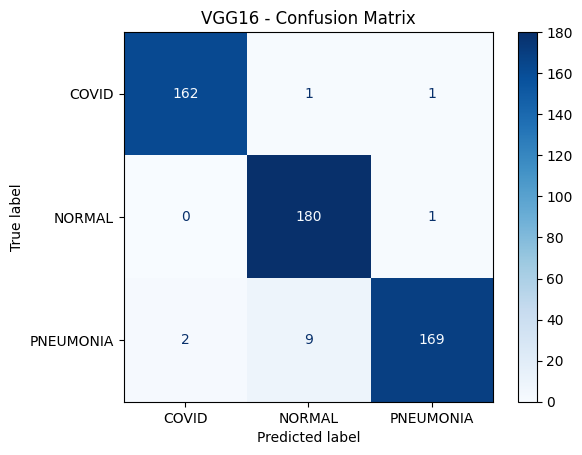

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
cm_vgg = confusion_matrix(y_true_vgg, y_pred_vgg)
disp_vgg = ConfusionMatrixDisplay(confusion_matrix=cm_vgg, display_labels=class_labels)
disp_vgg.plot(cmap='Blues')
plt.title("VGG16 - Confusion Matrix")
plt.show()

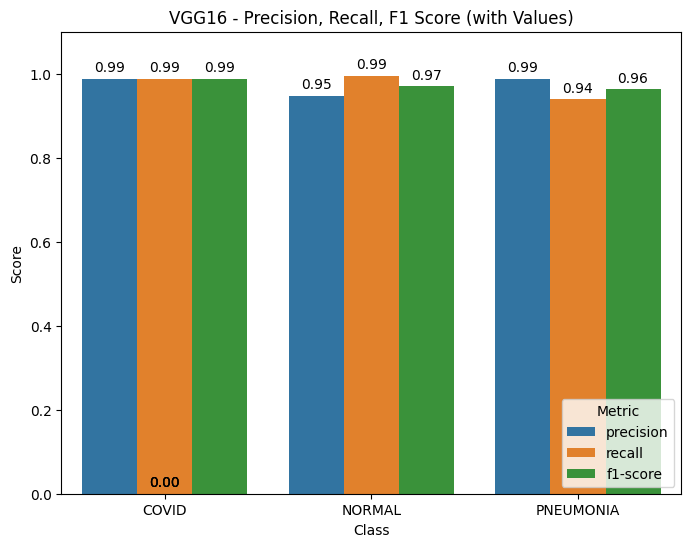

In [ ]:
# precision, recall, f1-score evaluation
vgg_scores = pd.DataFrame(report_vgg).transpose()[['precision', 'recall', 'f1-score']]
vgg_scores = vgg_scores.iloc[:3]
vgg_scores.index.name = 'Class'
vgg_scores.reset_index(inplace=True)

# Melt and plot
melted_vgg = vgg_scores.melt(id_vars='Class', var_name='Metric', value_name='Score')
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=melted_vgg, x='Class', y='Score', hue='Metric')

# Annotate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.title("VGG16 - Precision, Recall, F1 Score (with Values)")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.show()

In [ ]:
# model is saved in data/models